`vstack` and `hstack` are functions provided by the NumPy library in Python. They are used for stacking or concatenating arrays.

`np.vstack`: Stands for 'vertical stack'. It is used to stack the sequence of input arrays vertically (i.e., row-wise) to make a single array.

```python
import numpy as np

a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

result = np.vstack((a, b))

print(result)
```

Output:
```
[[1 2 3]
 [4 5 6]]
```

`np.hstack`: Stands for 'horizontal stack'. It is used to stack the sequence of input arrays horizontally (i.e., column-wise) to make a single array.

```python
import numpy as np

a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

result = np.hstack((a, b))

print(result)
```

Output:
```
[1 2 3 4 5 6]
```

In your code, `np.vstack([y,x]).T` is used to stack arrays `y` and `x` vertically and then transpose the result to get a 2D array where `y` and `x` are columns.

In [126]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-5.0, 5.0, 100)
y = np.sqrt(10**2 - x**2)
y=  np.hstack([y,-y])
x=  np.hstack([x,-x])

In [127]:
x1 = np.linspace(-5.0, 5.0, 100)
y1 = np.sqrt(5**2 - x1**2)
y1=  np.hstack([y1,-y1])
x1=  np.hstack([x1,-x1])

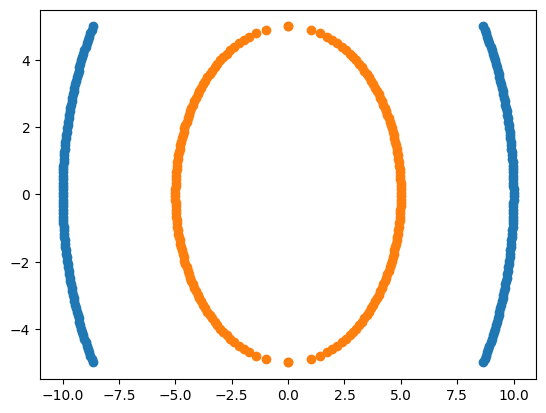

In [128]:
plt.scatter(y,x)
plt.scatter(y1,x1)

In [129]:
import pandas as pd
df1 = pd.DataFrame(np.vstack([y,x]).T,columns=['X1','X2'])
df1['Y'] = 0
df2 = pd.DataFrame(np.vstack([y1,x1]).T,columns=['X1','X2'])
df2['Y'] = 1
df = pd.concat([df1, df2], ignore_index=True)
df.head()

,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


In [130]:
df.tail()

,X1,X2,Y
395,-1.969049,-4.59596,1
396,-1.714198,-4.69697,1
397,-1.406908,-4.79798,1
398,-0.999949,-4.89899,1
399,-0.000000,-5.00000,1


### Polynomial Kernel

![Polynomial Kernel](Polynomial%20Kernel%20%20(1).png)

### Based on the formula find the componenets for the Polynomial kernel

In [131]:
df['X1_square'] = df['X1']**2
df['X2_square'] = df['X2']**2
df['X1*X2']= df['X1']*df['X2']

In [132]:
df.head()

,X1,X2,Y,X1_square,X2_square,X1*X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [133]:
X = df[['X1_square','X2_square','X1*X2']]
y = df['Y']

In [134]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<Axes: >

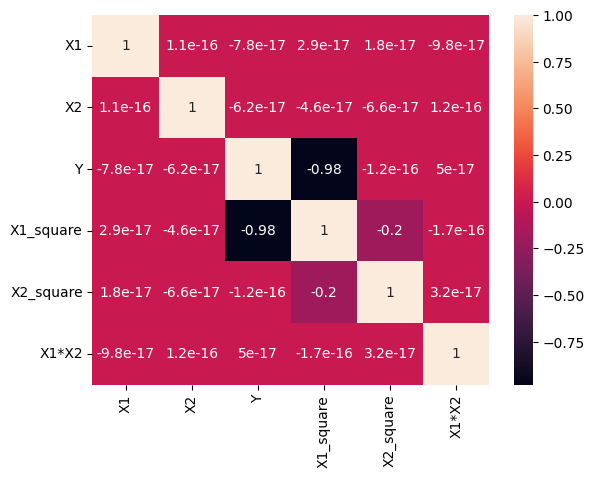

In [135]:
import seaborn as sns   
sns.heatmap(df.corr(),annot=True)

In [136]:
import matplotlib.pyplot as plt
%matplotlib inline

In [137]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [138]:
import plotly.express as px
fig = px.scatter_3d(df, x='X1_square', y='X2_square', z='X1*X2',color='Y')

In [139]:
fig.show()
plt.show()

In [140]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC 
classifier = SVC(kernel='linear')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)


1.0

In [141]:
df.head()

,X1,X2,Y,X1_square,X2_square,X1*X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [142]:
X = df.iloc[:,0:2]
y = df['Y']

In [143]:
X.head()

,X1,X2
0,8.660254,-5.00000
1,8.717792,-4.89899
2,8.773790,-4.79798
3,8.828277,-4.69697
4,8.881281,-4.59596


In [144]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: Y, Length: 400, dtype: int64

In [145]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [146]:
classifier = SVC(kernel='rbf')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

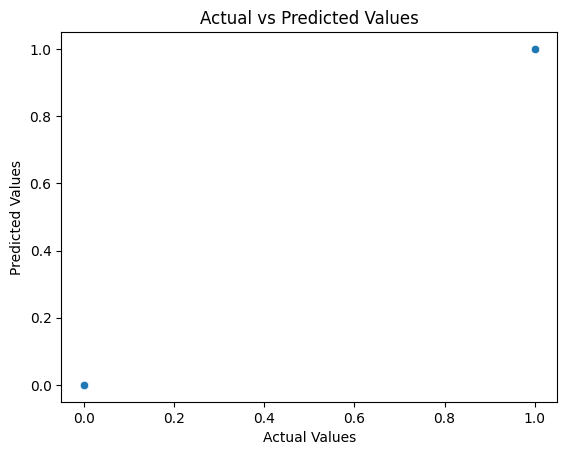

In [147]:
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

In [148]:
classifier = SVC(kernel='poly')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.6916666666666667

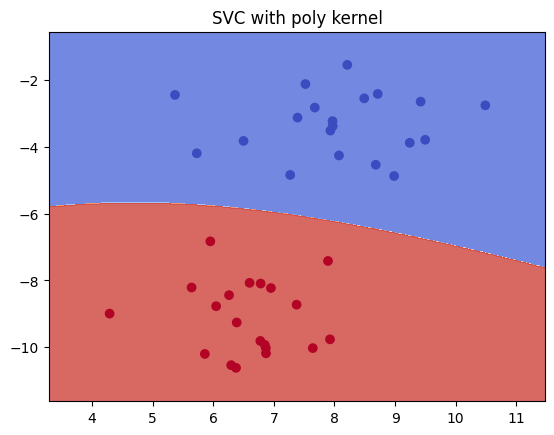

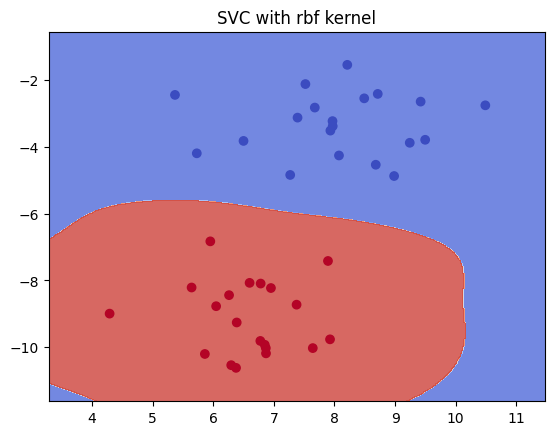

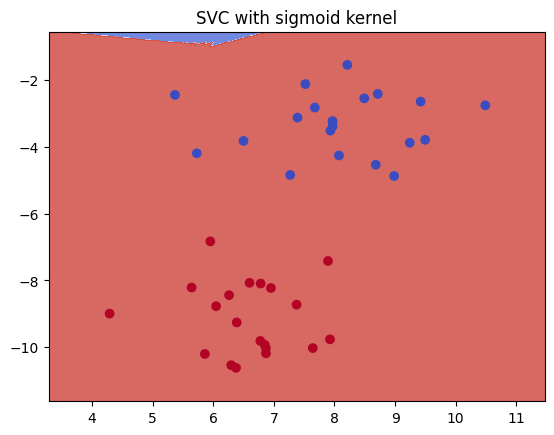

In [149]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
from sklearn.datasets import make_blobs

# we create 40 separable points
X, y = make_blobs(n_samples=40, centers=2, random_state=6)

# fit the model for different kernels
kernels = ['poly', 'rbf', 'sigmoid']
for kernel in kernels:
    clf = svm.SVC(kernel=kernel, gamma='auto')
    clf.fit(X, y)

    plt.figure()

    # create a mesh to plot in
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.title(f'SVC with {kernel} kernel')
    plt.show()

In [150]:
df= pd.DataFrame({'x':X[:,0],'y':X[:,1],'target':y})

In [151]:
df

,x,y,target
0,6.377345,-10.615107,1
1,6.500727,-3.824036,0
2,4.292259,-8.992204,1
3,7.391695,-3.126693,0
4,7.643063,-10.023569,1
5,8.681857,-4.536835,0
6,5.370422,-2.447152,0
7,9.242238,-3.880031,0
8,5.730058,-4.194811,0
9,7.968331,-3.231253,0


In [152]:
y_min , y_max

(-11.61510727197525, -0.5478135801664294)

In [153]:
xx , yy

(array([[ 3.29225906,  3.31225906,  3.33225906, ..., 11.43225906,
         11.45225906, 11.47225906],
        [ 3.29225906,  3.31225906,  3.33225906, ..., 11.43225906,
         11.45225906, 11.47225906],
        [ 3.29225906,  3.31225906,  3.33225906, ..., 11.43225906,
         11.45225906, 11.47225906],
        ...,
        [ 3.29225906,  3.31225906,  3.33225906, ..., 11.43225906,
         11.45225906, 11.47225906],
        [ 3.29225906,  3.31225906,  3.33225906, ..., 11.43225906,
         11.45225906, 11.47225906],
        [ 3.29225906,  3.31225906,  3.33225906, ..., 11.43225906,
         11.45225906, 11.47225906]]),
 array([[-11.61510727, -11.61510727, -11.61510727, ..., -11.61510727,
         -11.61510727, -11.61510727],
        [-11.59510727, -11.59510727, -11.59510727, ..., -11.59510727,
         -11.59510727, -11.59510727],
        [-11.57510727, -11.57510727, -11.57510727, ..., -11.57510727,
         -11.57510727, -11.57510727],
        ...,
        [ -0.59510727,  -0.59510727,